# Assignment No: 05

Name: Mansi Sanjay Chavan

Roll No: 2447064

Batch: D

Problem Statement:
    
Use different voting mechanism and Apply AdaBoost (Adaptive Boosting), Gradient 
Tree Boosting (GBM), XGBoost classification on Iris dataset and compare the 
performance of three models using different evaluation measures. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='Species', ylabel='count'>

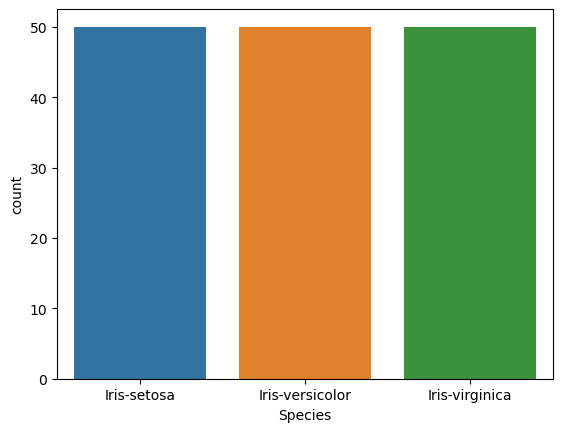

In [4]:
sns.countplot(data=data, x='Species')

In [5]:
data = data.drop('Id', axis=1)

In [6]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
X = data.drop('Species', axis=1)

In [9]:
y = data['Species']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
from sklearn.ensemble import AdaBoostClassifier

In [13]:
model = AdaBoostClassifier(n_estimators=1)

In [14]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [15]:
preds = model.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

In [17]:
print(classification_report(y_test, preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.00      0.00      0.00        20
 Iris-virginica       0.38      1.00      0.55        12

       accuracy                           0.56        45
      macro avg       0.46      0.67      0.52        45
   weighted avg       0.39      0.56      0.43        45



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:xlabel='PetalWidthCm', ylabel='count'>

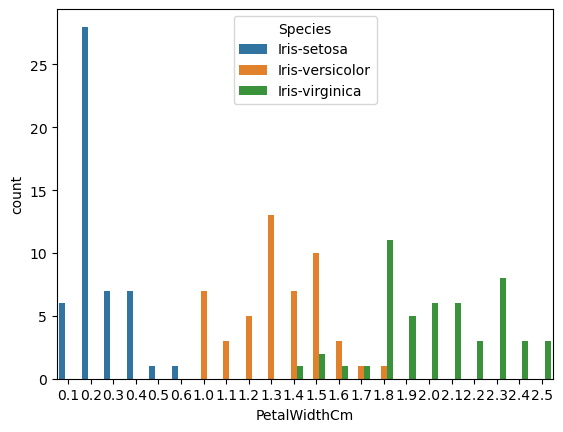

In [18]:
sns.countplot(data=data, x='PetalWidthCm', hue='Species')

In [19]:
error_rates = []

for n in range(1,4):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    error_rates.append(1-accuracy_score(y_test, preds))

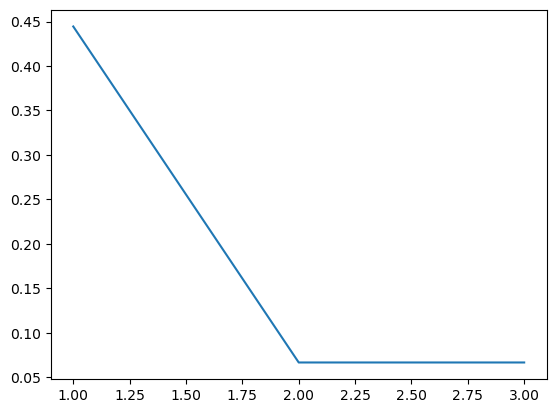

In [20]:
plt.plot(range(1,4), error_rates)

In [21]:
model = AdaBoostClassifier(n_estimators=2)
model.fit(X_train, y_train)
preds = model.predict(X_test)
accuracy_score(y_test, preds)

0.9333333333333333

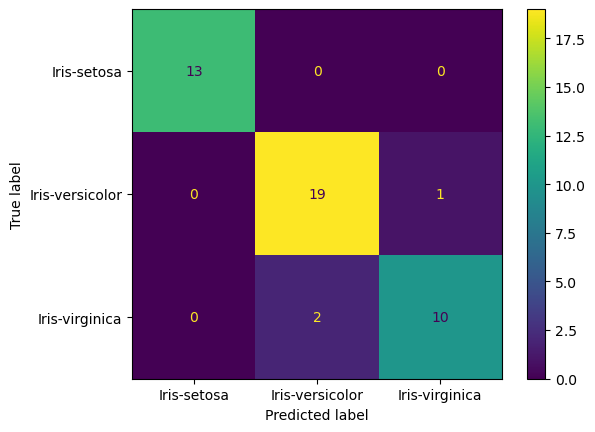

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, preds)

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
model = GradientBoostingClassifier(n_estimators=1)

In [25]:
model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=1)

In [26]:
preds = model.predict(X_test)

In [27]:
print(classification_report(y_test, preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.95      0.97        20
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [28]:
error_rates = []

for n in range(1,4):
    model = GradientBoostingClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    error_rates.append(1-accuracy_score(y_test, preds))

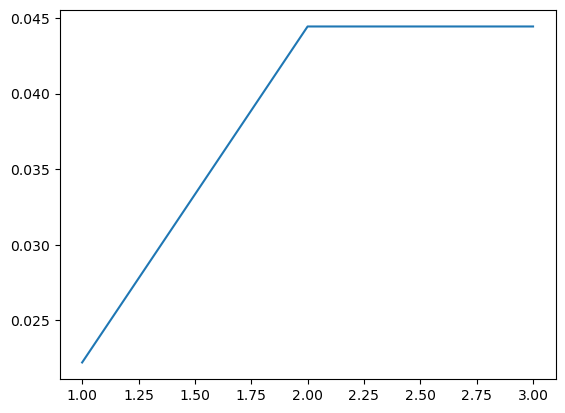

In [29]:
plt.plot(range(1,4), error_rates)

In [30]:
model = GradientBoostingClassifier(n_estimators=2)
model.fit(X_train, y_train)
preds = model.predict(X_test)
accuracy_score(y_test, preds)

0.9555555555555556

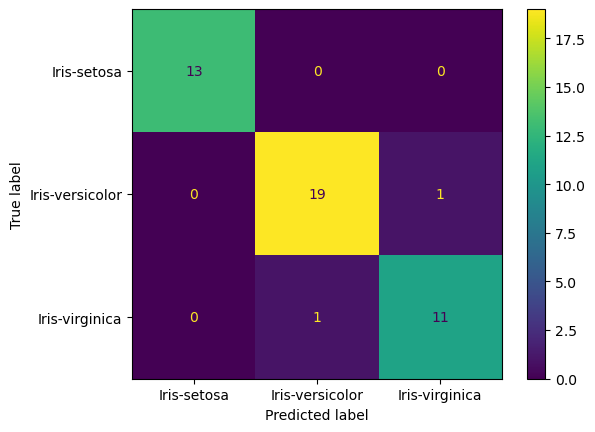

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, preds)